## Download Datasets

In [1]:
import urllib.request
import os

In [2]:
# download training dataset
url_1 = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1530516448&Signature=mVnnWeE%2BGzOXe2KtfIX6k9nh7FvphehDcem%2Fp9HQqYyMi11xbUFpwAwx2m1yZz6SjWpgQ86JGBHxAZrTxyQbiulX20FvGy%2FPCZMtt5di6WKCnOv61kUZout%2F%2BeDIaBb0m2wS3GxkQ39TXauIB8%2FEviSyVy5IUBRqm9p1YvMx2lptwNEGia7WMS3HfWW2CMPcyxZxiJgWIdi9Ur09WlqMD%2BUAmaOAjp5xcdCnSIp4Xr68xpwDC9Ec%2BSIcBrv%2FwSODdzmWimMO8hpc3%2Ba5RM6XijOjQLTk4ATOQtdQd989obuY2TCpm43JAvh%2BCZa5Iu2YBbS6Yt6kYaXlXMVQHDrj9A%3D%3D'
file_path_1 = 'titanic_train.csv'
if not os.path.isfile(file_path_1):
    result_1 = urllib.request.urlretrieve(url_1, file_path_1)
    print('download:', result_1)

download: ('titanic_train.csv', <http.client.HTTPMessage object at 0x10a5b5c18>)


In [3]:
# download testing sataset
url_2 = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1530516602&Signature=PSro%2BVTemNrv6jmW6razMjS7oMHXa9Fo7yKnvEwv2A6tjP8%2BvASDJah1A%2F3cOyWuktijzC7KkLAy2Nz1sGT1h6bq6tNMsHFmu290Fm5sw3Uj0ieqUKpXp5VIdfT%2FqyFchrlcqhBka1ewygcKkYOcpwYJ%2BkIa1NDrGaodQ1ItZBDQdavMGFqpTILdfDKu4gxUHcDikTm6%2Ft%2FhVPKCHTxUGY89odi9CGRyW1YD3Xj2k0WcZKM6h13d7Ft14CcaTaxSFSwX1jA%2FybPfZZaJEv8XhVPN0xjsJB8LnnW%2BrECTi2eEEMXxk7xQUOlQx3L9mHH1AFcrFHe8SRpcRxsmEYS0Mw%3D%3D'
file_path_2 = 'titanic_test.csv'
if not os.path.isfile(file_path_2):
    result_2 = urllib.request.urlretrieve(url_2, file_path_2)
    print('download:', result_2)

download: ('titanic_test.csv', <http.client.HTTPMessage object at 0x10ae49080>)


## Read in Data

#### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


#### Data Frame

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

# combine train & test
df_all = df_train.append(df_test, ignore_index=True, sort=False)

#### Quickly Look Training & Testing Datasets

In [3]:
print('training data shape = {}:\n'.format(df_train.shape))
print('testing data shape = {}:\n'.format(df_test.shape))
print('all data shape = {}:\n'.format(df_all.shape))
df_all.sample(5)

training data shape = (891, 12):

testing data shape = (418, 11):

all data shape = (1309, 12):



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
260,261,0.0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
449,450,1.0,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
467,468,0.0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
67,68,0.0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
561,562,0.0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S


## Feature Engineering

#### Missing Value Handling

In [4]:
# check the missing value of all data (Survived: 418 nan means that there is no target in testing data)
df_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### *Fare Feature*
* Check the correlation NaN Fare, which is:
    - a male
    - 60.5 years old
    - with no cabin
    - embarked at S on pclass 3
* After handling the missing value of fare, group all passenger's fare into 5 bins.
* Check survival correlation by FareRange feature, we could find:
    - There is a higher survival rate as the fare increasing.

In [5]:
df_all[df_all.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [6]:
compute_fare = df_all.loc[(df_all['Embarked']=='S')&
                          (df_all['Age']>50)&
                          (df_all['Pclass']==3)&
                          (df_all['Sex']=='male')&
                          (df_all['Cabin'].isnull())]
compute_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
406,407,0.0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
631,632,0.0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
# replace missing values with the mean value
df_all.Fare.fillna(value=compute_fare.Fare.mean(), inplace=True)

In [8]:
# define fare range
fare_range = ['Cheap', 'Low', 'Medium', 'High', 'Expensive']

# add new feature
df_all['FareRange'] = pd.qcut(df_all.Fare, q=5, labels=fare_range)

In [9]:
# groupby Survived and FareRange
df_all[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean()

,FareRange,Survived
0,Cheap,0.217877
1,Low,0.201087
2,Medium,0.426901
3,High,0.443243
4,Expensive,0.645349


### *Embarked Feature*
* Embarked at S is most common, so replace the NaN with 'S'.
* Check survival correlation by Embarked feature, we could find:
    - Passengers have the almost same survival rate which embarked at Q and S.

In [10]:
df_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
# eplace missing values with the mode
df_all.Embarked.fillna(value='S', inplace=True)

In [12]:
# groupby Survived and Embarked
df_all[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### *Name Feature*
* Separate first name and last name, then, get the Title of each passenger:
    - combine the same title (e.g., Mlle equals Miss)
    - group and combine the rare title into Other title
* Check survival correlation by Title feature:
    - Generally speaking, passengers who is female have the higher survival rate.

In [13]:
print('the name of each person:\n')
df_all.Name.sample(5)

the name of each person:



260             Smith, Mr. Thomas
590          Rintamaki, Mr. Matti
971          Boulos, Master. Akar
639    Thorneycroft, Mr. Percival
919       Brady, Mr. John Bertram
Name: Name, dtype: object

In [14]:
# separate first name and last name, get the title
df_all['Title'] = df_all.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])

print('title feature of all data:\n')
df_all.Title.value_counts()

title feature of all data:



Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Jonkheer          1
Sir               1
Capt              1
Don               1
Mme               1
Dona              1
Lady              1
the Countess      1
Name: Title, dtype: int64

In [15]:
# combine the same title
df_all.Title.replace('Mlle', 'Miss', inplace=True)
df_all.Title.replace(['Mme','Lady','Ms'], 'Mrs', inplace=True)

# replace the other title with 'Rare' title
df_all.Title.replace(df_all.Title.value_counts().index[4:], 'Other', inplace=True)

print('title feature of all data:\n')
df_all.Title.value_counts()

title feature of all data:



Mr        757
Miss      262
Mrs       201
Master     61
Other      28
Name: Title, dtype: int64

In [16]:
# groupby Survived and Title
df_all[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Other,0.318182


### *SibSp & Parch Feature*
* Combine SibSp & Parch (+1 represents oneself), named FamilySize.
    - Passengers are almost dead who are in large family size (>4), so group them into 'Zero' FamilySize.
    - We could clearly find that there is a higher survival rate as family size increasing.
* Based on the family size, creat a new feature: IsAlone.
    - Passengers who are single have the higher survival rate.

In [17]:
# define family size feature (+1 represents oneself)
df_all['FamilySize'] = df_all.SibSp.values + df_all.Parch.values + 1

# define new feature, check 'is alone or not' has impact on survival rate
df_all['IsAlone'] = df_all.FamilySize.apply(lambda x: 'No' if x==1 else 'Yes')

In [18]:
# groupby Survived and FamilySize
df_all[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [19]:
# groupby Survived and IsAlone
df_all[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,No,0.303538
1,Yes,0.505650


In [20]:
# group the family size (>4) into zero
df_all['FamilySizeGroup'] = df_all.FamilySize.apply(lambda x: 0 if x>4 else x)

# groupby Survived and IsAlone
print('Note that FamilySizeGroup = 0 indicates the all passengers in large family size (>4).\n')
df_all[['FamilySizeGroup', 'Survived']].groupby(['FamilySizeGroup'], as_index=False).mean()

Note that FamilySizeGroup = 0 indicates the all passengers in large family size (>4).



,FamilySizeGroup,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


### *Ticket Feature*
* It seems that there are two categories in ticket feature:
    - number
    - letters + number
* Take the first element (a number or a letter) which probably represents a different classes:
    - Check survival correlation by Ticket & Fare feature, we could conclude:
        + The main categories of ticket feature are first number 3, 2, and 1, which have the higher survival rate.
        + First letter P corresponds to very high fare and higher survival rate.
* Creat new feature named TicketGroup, which combines the smaller samples (i.e., quantity is less than first letter C).
    - Check survival correlation by TicketGroup & Fare.

In [21]:
df_all.Ticket.sample(15)

877           349212
277           239853
1281           12749
5             330877
339           113784
48              2662
674           239856
1148          363611
1304       A.5. 3236
941            13695
614           364512
1244          220845
1132          237789
470           323592
211     F.C.C. 13528
Name: Ticket, dtype: object

In [22]:
# take the first element of each ticket number
df_all.Ticket = df_all.Ticket.apply(lambda x: str(x)[0])

df_all.Ticket.value_counts()

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
8      2
9      2
Name: Ticket, dtype: int64

In [23]:
# groupby Survived, Ticket, and Fare
df_all[['Ticket', 'Fare', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare,Survived
0,1,65.771211,0.630137
1,2,20.235194,0.464481
2,3,15.362201,0.239203
3,4,16.764036,0.200000
4,5,19.262500,0.000000
5,6,19.153711,0.166667
6,7,9.197438,0.111111
7,8,8.397900,0.000000
8,9,7.750000,1.000000
9,A,10.189681,0.068966


In [24]:
df_all['TicketGroup'] = df_all.Ticket.apply(lambda x: '#' if 
                                            (x!='3')&(x!='2')&(x!='1')&(x!='S')&(x!='P')&(x!='C') else x)

# groupby Survived and TicketGroup
df_all[['TicketGroup', 'Fare', 'Survived']].groupby(['TicketGroup'], as_index=False).mean()

,TicketGroup,Fare,Survived
0,#,16.074442,0.166667
1,1,65.771211,0.630137
2,2,20.235194,0.464481
3,3,15.362201,0.239203
4,C,28.152273,0.340426
5,P,119.698253,0.646154
6,S,17.542900,0.323077


### *Age Feature*
* Observe NaN age correlation by the other features, the missing age are almost from:
    - Title: Mr
    - Pclass: 3
    - Sex: male
    - FamilySize: 1
    - Ticket: 3
    - FareRange: Cheap
    - Embarked: S
* After handling the missing values, group the all passenger's age into 6 range.

In [25]:
age_nan = df_all[df_all.Age.isnull()][['Title', 'Pclass', 'Sex', 'FamilySize', 'Ticket', 'FareRange', 'Embarked']]
for i in age_nan.columns:
    print(age_nan[i].value_counts())
    print()

Mr        176
Miss       50
Mrs        28
Master      8
Other       1
Name: Title, dtype: int64

3    208
1     39
2     16
Name: Pclass, dtype: int64

male      185
female     78
Name: Sex, dtype: int64

1     200
2      29
3      15
11     10
5       5
4       4
Name: FamilySize, dtype: int64

3    110
2     48
1     35
S     14
C     13
P     12
A     11
4      5
W      5
6      4
F      3
7      1
9      1
L      1
Name: Ticket, dtype: int64

Cheap        97
Low          56
High         43
Medium       38
Expensive    29
Name: FareRange, dtype: int64

S    132
Q     73
C     58
Name: Embarked, dtype: int64



In [26]:
compute_age = df_all.loc[(df_all.Title=='Mr')&
                         (df_all.Pclass==3)&
                         (df_all.Sex=='male')&
                         (df_all.FamilySize==1)&
                         (df_all.Ticket=='3')&
                         (df_all.FareRange=='Cheap')&
                         (df_all.Embarked=='S')]

In [27]:
# replace missing values with the mean value
df_all.Age.fillna(value=compute_age.Age.mean(), inplace=True)

In [28]:
# define age group
bins = [0, 6, 12, 18, 40, 65, 100]
age_group = ['Baby', 'Child', 'Teenager', 'Adult', 'MiddleAged', 'Elder']

# add a nwe feature
df_all['AgeGroup'] = pd.cut(df_all.Age, bins, labels=age_group)

In [29]:
# groupby Survived and AgeGroup
df_all[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Survived
0,Baby,0.702128
1,Child,0.318182
2,Teenager,0.428571
3,Adult,0.360465
4,MiddleAged,0.380282
5,Elder,0.125000


## Visualization
* Check what impact does each selected feature have on survival rate

In [30]:
# define a function that could plot the survival correlation by each feature
def plotFeatureSurvived(features):
    fig = plt.figure(figsize=(25, 13), facecolor='w')
    for i, j in enumerate(features):
        ax = fig.add_subplot(2, 4, i+1)
        result = sns.barplot(x=j, y='Survived', data=df_all, ci=None, ax=ax)
        result.set_xlabel('')
        result.set_ylabel('Survival rate')
        result.set_title('%s feature'%(j))

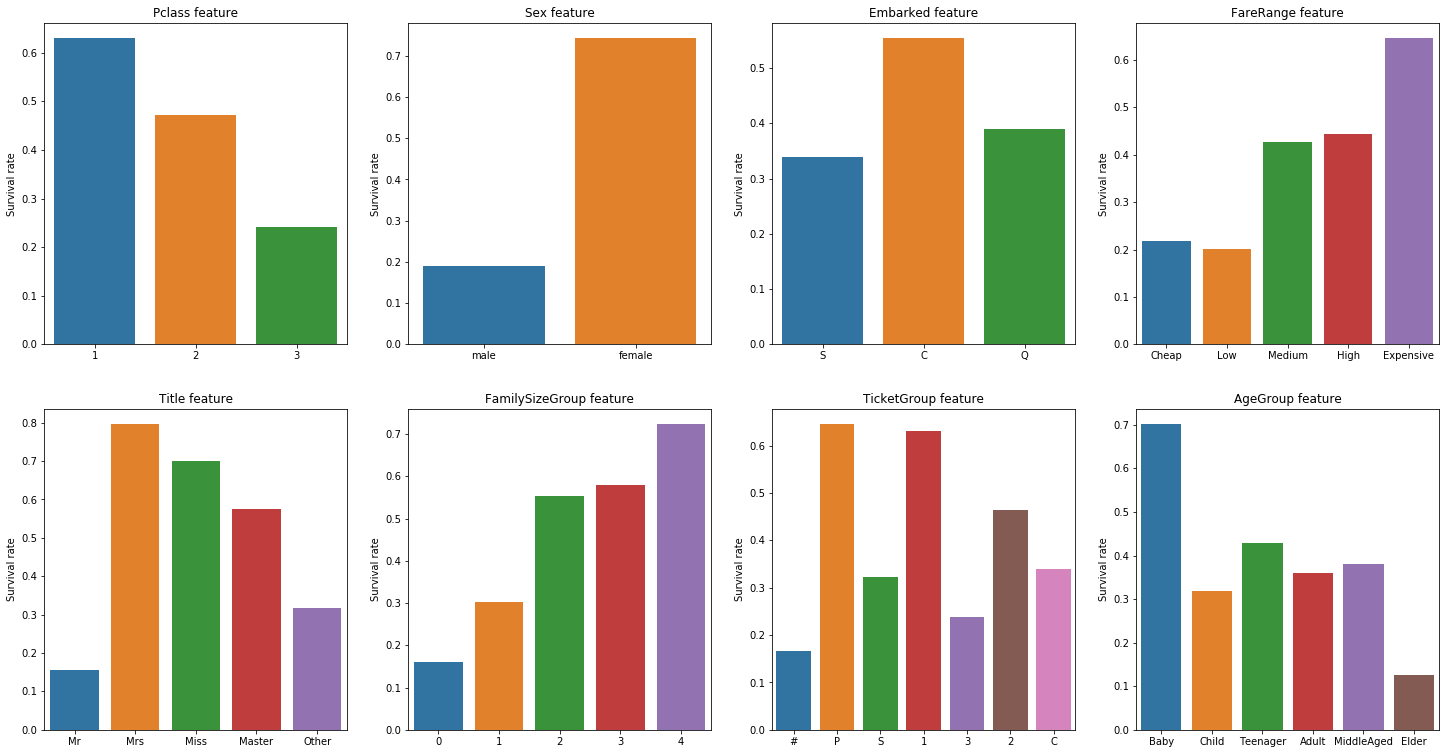

In [31]:
feature_list = ['Pclass', 'Sex', 'Embarked', 'FareRange', 'Title', 'FamilySizeGroup', 'TicketGroup', 'AgeGroup']
plotFeatureSurvived(feature_list)

In [32]:
df_all[feature_list].head()

,Pclass,Sex,Embarked,FareRange,Title,FamilySizeGroup,TicketGroup,AgeGroup
0,3,male,S,Cheap,Mr,2,#,Adult
1,1,female,C,Expensive,Mrs,2,P,Adult
2,3,female,S,Low,Miss,1,S,Adult
3,1,female,S,Expensive,Mrs,2,1,Adult
4,3,male,S,Low,Mr,1,3,Adult


## Neural Network with Keras
* Features to be trained (one-hot encoding is needed):
    - Pclass
    - Sex
    - Embarked
    - FareRange
    - Title
    - FamilySizeGroup
    - TicketGroup
    - AgeGroup

#### Feature Matrix & Response Vector

In [33]:
X_train = df_all[feature_list].iloc[:891]
y_train = df_all.Survived.iloc[:891].astype(int)
X_test = df_all[feature_list].iloc[891:]

#### One-Hot Encoding

In [34]:
# training data
X_train = pd.get_dummies(data=X_train)

# testing data
X_test = pd.get_dummies(data=X_test)

#### Split Training Datasets into Training and Validation Datasets

In [35]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, 
                                                                          test_size=0.4, random_state=2)

#### Establish Model

In [47]:
model = Sequential()

# layers
model.add(Dense(input_dim=len(X_train.columns), units=15, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# it's a binary classification problem, use binary cross entropy as loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size = 32, epochs = 200, verbose=0)

In [48]:
# use validation set to evaluate accuracy
scores = model.evaluate(X_val_split, y_val_split, verbose=0)
print('Accuracy = {}%'.format(scores[1]*100))

Accuracy = 85.7142857309817%


In [49]:
# prediction
pred_NN = pd.DataFrame(model.predict_classes(X_test), index=df_test.PassengerId)

In [50]:
# creat CSV file
pred_NN.to_csv('Prediction_NN.csv', header=['Survived'], index_label='PassengerId')